Sprint 4


IBM cloud deployment
Team ID:PNT2022TMID22106
Importing the required libraries

In [120]:
pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps



Load data

In [158]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Data Analysis

In [159]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [160]:
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [161]:
y_train[0]

5

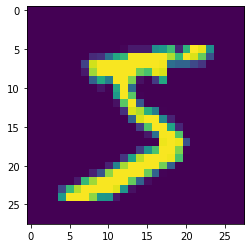

In [162]:
plt.imshow(X_train[0])

In [165]:
np.argmax(y_train[6000])

0

Data Pre-Processing

In [166]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [167]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [168]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [169]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [170]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [171]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 202s 107ms/step - loss: 0.2014 - accuracy: 0.9532 - val_loss: 0.0975 - val_accuracy: 0.9703
Epoch 2/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0663 - accuracy: 0.9791 - val_loss: 0.0757 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0855 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.1014 - val_accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 198s 106ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.1032 - val_accuracy: 0.9762


Test the model

In [172]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10323227196931839, 0.9761999845504761]


In [173]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 77ms/step
[[9.7440197e-14 5.0647978e-23 6.1852941e-14 5.6889354e-12 3.5486336e-24
  1.2185264e-17 1.1363700e-21 1.0000000e+00 9.2823884e-15 9.9762917e-14]
 [8.9239827e-10 1.1700600e-11 1.0000000e+00 2.1810984e-12 4.1619899e-18
  8.1156847e-17 2.3863511e-09 1.8723026e-18 7.5456592e-09 1.0914637e-17]
 [2.2654262e-07 9.9992788e-01 7.7873403e-07 3.4489101e-08 3.0678271e-05
  7.2852018e-09 1.8013621e-08 6.7711934e-09 4.0432955e-05 4.3470568e-13]
 [9.9999809e-01 3.1609156e-15 1.5382167e-08 1.3025791e-13 3.1233005e-13
  1.2426512e-11 1.0328006e-06 4.0505735e-16 3.5975039e-09 8.6925991e-07]]


In [178]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save the model

In [175]:
model.save("model.h5")